In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shuvoalok_raf_db_dataset_path = kagglehub.dataset_download('shuvoalok/raf-db-dataset')

print('Data source import complete.')


Data source import complete.


# FEATURES EXTRACTION

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/raf-db-dataset
/kaggle/input/raf-db-dataset/DATASET
/kaggle/input/raf-db-dataset/DATASET/test
/kaggle/input/raf-db-dataset/DATASET/test/7
/kaggle/input/raf-db-dataset/DATASET/test/2
/kaggle/input/raf-db-dataset/DATASET/test/5
/kaggle/input/raf-db-dataset/DATASET/test/3
/kaggle/input/raf-db-dataset/DATASET/test/1
/kaggle/input/raf-db-dataset/DATASET/test/4
/kaggle/input/raf-db-dataset/DATASET/test/6
/kaggle/input/raf-db-dataset/DATASET/train
/kaggle/input/raf-db-dataset/DATASET/train/7
/kaggle/input/raf-db-dataset/DATASET/train/2
/kaggle/input/raf-db-dataset/DATASET/train/5
/kaggle/input/raf-db-dataset/DATASET/train/3
/kaggle/input/raf-db-dataset/DATASET/train/1
/kaggle/input/raf-db-dataset/DATASET/train/4
/kaggle/input/raf-db-dataset/DATASET/train/6


In [8]:
#import các thư viện cần thiết
import os  #làm việc với file và folder
import cv2 #xử lý ảnh
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm

In [9]:
train_labels = "kaggle/input/raf-db-dataset/train_labels.csv"
test_labels = "kaggle/input/raf-db-dataset/test_labels.csv"

#các nhãn cảm xúc
classes=['Suprise','Fear','Disgust','Happy','Sad','Angry','Neural']
label_map = {label: (idx+1) for idx, label in enumerate(classes)}

print(label_map)

{'Suprise': 1, 'Fear': 2, 'Disgust': 3, 'Happy': 4, 'Sad': 5, 'Angry': 6, 'Neural': 7}


In [10]:
def load_data(dataset_dir, label_map):
    images = []
    labels = []

    for label, idx in tqdm(label_map.items(),desc="Preparing data"):
        folder_path = os.path.join(dataset_dir, str(idx))
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img_rgb)
            labels.append(idx)

    return np.array(images), np.array(labels)
train_images, train_labels = load_data('/kaggle/input/raf-db-dataset/DATASET/train', label_map)
test_images, test_labels = load_data('/kaggle/input/raf-db-dataset/DATASET/test', label_map)
print(train_images.shape)
print(test_images.shape)

Preparing data:   0%|          | 0/7 [00:00<?, ?it/s]

Preparing data:   0%|          | 0/7 [00:00<?, ?it/s]

(12271, 100, 100, 3)
(3068, 100, 100, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

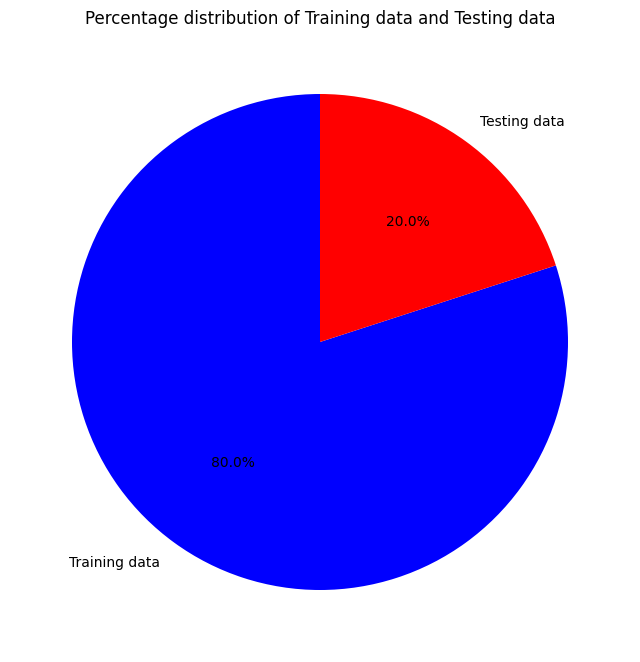

In [11]:
total_samples=len(train_images)+len(test_images)

train_percentage=len(train_images)/total_samples*100
test_percentage=len(test_images)/total_samples*100

labels=['Training data','Testing data']
sizes=[train_percentage,test_percentage]
colors=['blue','red']

plt.figure(figsize=(8,12))
plt.title('Percentage distribution of Training data and Testing data')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show



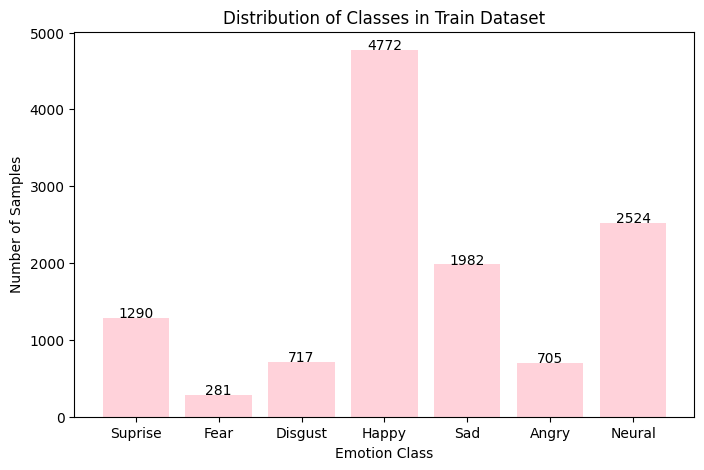

In [12]:
unique_classes, class_counts = np.unique(train_labels, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, class_counts, color='pink', alpha=0.7)

if 'classes' in globals():
    plt.xticks(unique_classes, classes)
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in Train Dataset")
for i, count in enumerate(class_counts):
    plt.text(unique_classes[i], count + 5, str(count), ha='center', fontsize=10)

plt.show()

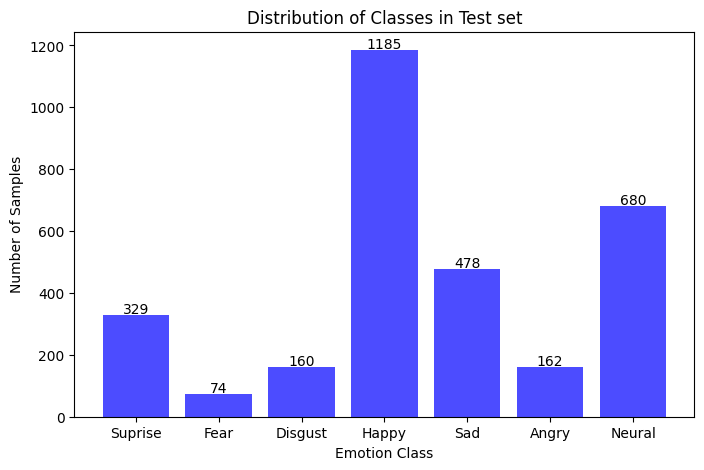

In [13]:
unique_classes, class_counts = np.unique(test_labels, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, class_counts, color='blue', alpha=0.7)

if 'classes' in globals():
    plt.xticks(unique_classes, classes)
plt.xlabel("Emotion Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in Test set")
for i, count in enumerate(class_counts):
    plt.text(unique_classes[i], count + 5, str(count), ha='center', fontsize=10)

plt.show()

In [14]:
X=train_images
y=train_labels

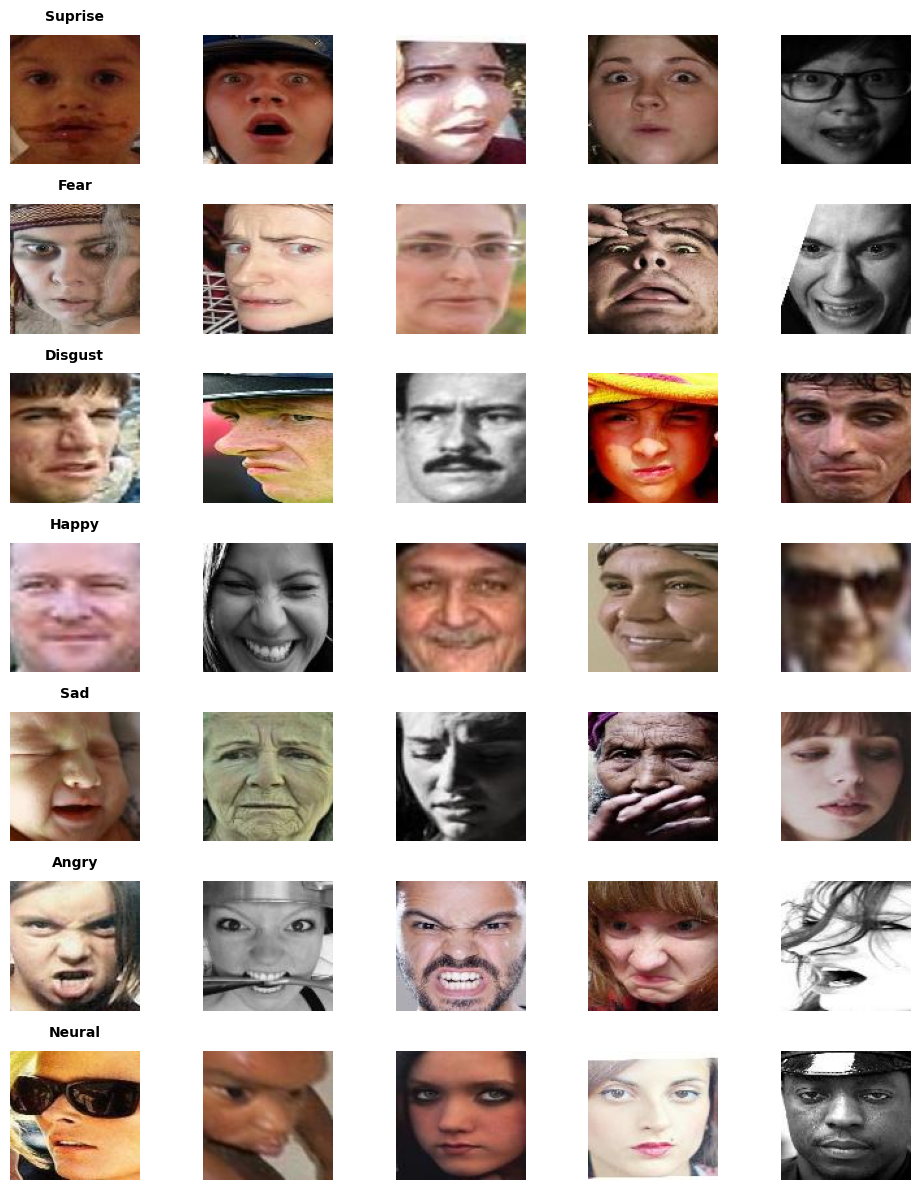

In [15]:
def show_examples(train_images, train_labels, labels, num_examples=5):
    num_classes = len(classes)
    fig, axs = plt.subplots(num_classes, num_examples, figsize=(10, 12))

    for i, class_name in enumerate(classes):
        class_indices = [idx for idx, label in enumerate(train_labels) if label == i+1]
        selected_indices = np.random.choice(class_indices, num_examples, replace=False)
        axs[i, 0].set_title(class_name, fontsize=10, pad=10, fontweight='bold')
        for j, idx in enumerate(selected_indices):
            img = train_images[idx]
            axs[i, j].imshow(img)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

show_examples(X, y, classes)

In [17]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

#P: số pixel lân cận ở của pixel trung tâm
#R: Bán kính của pixel lân cận mà ta sẽ xét - cách pixel trung tâm bao nhiêu pixel
#(vd: R=1 nghĩa là liền kề).
# def extract_lbp_features(images, P=8, R=1):
#     lbp_features = []
#     for img in tqdm(images, desc="Processing data"):
#         # LBP hoạt động trên ảnh xám => cần chuyển về ảnh xám
#         if len(img.shape) > 2:
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         else:
#             gray = img
#
#         # Tính LBP
#         lbp = local_binary_pattern(gray, P, R, method='uniform')
#         # Tính histogram
#         (hist, _) = np.histogram(lbp.ravel(),
#                                  bins=np.arange(0, P + 3),
#                                  range=(0, P + 2))
#         hist = hist.astype("float")
#         hist /= (hist.sum() + 1e-6)
#         lbp_features.append(hist)
#     return np.array(lbp_features)

def extract_lbp_features(images, P=16, R=2, grid_size=(8, 8)):
    lbp_features = []
    for img in tqdm(images, desc="Processing data"):
        #convert RGB imgage (acctualy is BGR) into gray scale image
        if len(img.shape) > 2:
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        else:
            gray = img

        # Cân bằng sáng sau khi chuyển sang xám
        gray = cv2.equalizeHist(gray)

        h, w = gray.shape
        cell_h, cell_w = h // grid_size[0], w // grid_size[1]
        feature_vector = []

        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                y1, y2 = i * cell_h, (i + 1) * cell_h
                x1, x2 = j * cell_w, (j + 1) * cell_w
                cell = gray[y1:y2, x1:x2]

                lbp_cell = local_binary_pattern(cell, P, R, method='uniform')
                hist, _ = np.histogram(lbp_cell.ravel(),
                                       bins=np.arange(0, P + 3),
                                       range=(0, P + 2))
                hist = hist.astype("float")
                hist /= (hist.sum() + 1e-6)
                feature_vector.extend(hist)
        lbp_features.append(feature_vector)
    return np.array(lbp_features)

In [18]:
X_lbp = extract_lbp_features(train_images)
X_test_lbp = extract_lbp_features(test_images)

# Kiểm tra kích thước của các đặc trưng HOG
print(f"Shape of train LBP features: {X_lbp.shape}")
print(f"Shape of test LBP features: {X_test_lbp.shape}")

Processing data: 100%|██████████| 3068/3068 [00:38<00:00, 78.76it/s]


Shape of train LBP features: (12271, 1152)
Shape of test LBP features: (3068, 1152)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_lbp_scaled = scaler.fit_transform(X_lbp)
X_test_lbp_scaled = scaler.transform(X_test_lbp)

In [20]:
from sklearn.model_selection import train_test_split

X_train_lbp, X_val_lbp, y_train_lbp, y_val_lbp = train_test_split(
    X_lbp_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Train size: {len(X_train_lbp)}")
print(f"Validation size: {len(X_val_lbp)}")

Train size: 9816
Validation size: 2455


Accuracy: 0.5983706720977596

Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.56      0.51       258
           2       0.64      0.12      0.21        56
           3       0.24      0.16      0.19       143
           4       0.83      0.72      0.77       955
           5       0.46      0.54      0.50       397
           6       0.54      0.43      0.48       141
           7       0.52      0.65      0.58       505

    accuracy                           0.60      2455
   macro avg       0.53      0.46      0.46      2455
weighted avg       0.61      0.60      0.60      2455



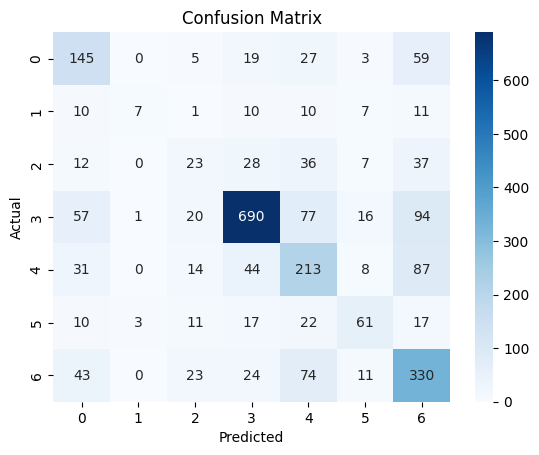

In [21]:
#Huấn luyện mô hình SVM cho trích xuất đặc trưng LBP
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_svm_lbp = SVC(
    kernel='rbf',        # kernel Gaussian RBF (hợp với dữ liệu phức tạp)
    C=1.0,               # độ phạt lỗi (tuning sau)
    gamma='scale',       # tự động chọn gamma
    class_weight='balanced',  # nếu dữ liệu bị mất cân bằng cảm xúc
    random_state=42
)

model_svm_lbp.fit(X_train_lbp, y_train_lbp)
y_pred = model_svm_lbp.predict(X_val_lbp)

# Đánh giá
print("Accuracy:", accuracy_score(y_val_lbp, y_pred))
print("\nClassification Report:\n", classification_report(y_val_lbp, y_pred))

# Vẽ confusion matrix
cm = confusion_matrix(y_val_lbp, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

LBP Accuracy:  0.6248370273794003

Classification Report:
              precision    recall  f1-score   support

     Suprise       0.50      0.58      0.54       329
        Fear       0.76      0.26      0.38        74
     Disgust       0.35      0.22      0.27       160
       Happy       0.82      0.75      0.78      1185
         Sad       0.47      0.53      0.50       478
       Angry       0.42      0.43      0.42       162
      Neural       0.59      0.68      0.64       680

    accuracy                           0.62      3068
   macro avg       0.56      0.49      0.50      3068
weighted avg       0.63      0.62      0.62      3068

Confusion Matrix:
 [[190  14  12  56  38  12  57]
 [  2  19   0   2   0   2   0]
 [  4   0  35  14  19   7  21]
 [ 32   9  21 884  61  27  46]
 [ 36  11  34  94 255  26  82]
 [  8  11  11  34  22  69   9]
 [ 57  10  47 101  83  19 465]]


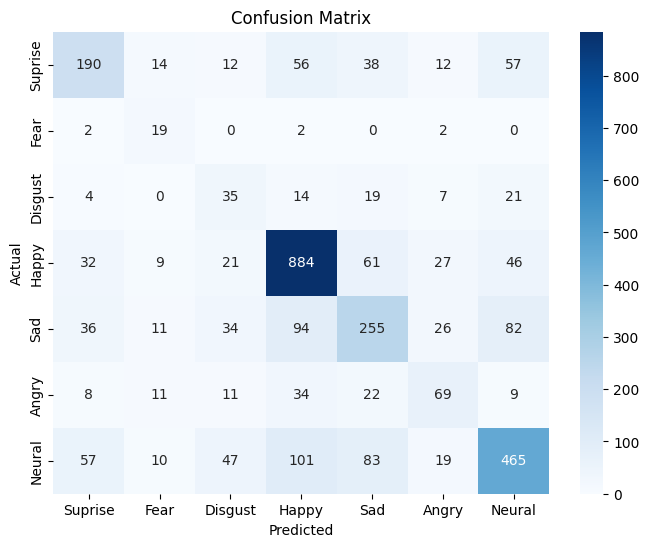

In [22]:
## from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_lbp = model_svm_lbp.predict(X_test_lbp_scaled)

# Đánh giá kết quả
print("LBP Accuracy: ", accuracy_score(test_labels, y_pred_lbp))
print("\nClassification Report:")
conf_matrix=confusion_matrix(y_pred_lbp,test_labels)
print(classification_report(test_labels, y_pred_lbp, target_names=list(label_map.keys())))
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Suprise','Fear','Disgust','Happy','Sad','Angry','Neural'], yticklabels=['Suprise','Fear','Disgust','Happy','Sad','Angry','Neural'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install scikit-optimize --quiet

from skopt import BayesSearchCV
from skopt.space import Real, Categorical

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
    'gamma': Real(1e-4, 1e+0, prior='log-uniform'),
    'kernel': Categorical(['rbf'])  # có thể mở rộng thêm
}

opt = BayesSearchCV(
    SVC(class_weight='balanced', random_state=42),
    param_space,
    n_iter=25,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=0,
    random_state=42
)

opt.fit(X_train_lbp, y_train_lbp)

# === 7. Đánh giá ===
print("Best Params:", opt.best_params_)
print("Best CV Score:", opt.best_score_)

y_pred = opt.predict(X_val_lbp)
print("\nValidation Accuracy:", accuracy_score(y_val_lbp, y_pred))
print(classification_report(y_val_lbp, y_pred))

# === 8. Confusion Matrix ===
cm = confusion_matrix(y_val_lbp, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.1 MB/s eta 0:00:00
